# Set up and Import

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

In [ ]:
rand_state = 1000

In [ ]:
df=pd.read_csv('/content/wage_regularization.csv')

In [ ]:
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


# 1.Scale the Data Frame


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

We kept getting a warning when we ran number 7 that LASSO and ElasticNet models had probelms converging. We ran the Mean and STD to make sure the scaler was working correctly, which it is. (mean is close to zero and std is close to one)


In [ ]:
print(df_sc.mean())
print(df_sc.std())

wage    -8.359326e-17
educ    -1.063914e-16
educ2   -1.519878e-17
educ3    1.291896e-16
educ4    1.367890e-16
educ5    7.599388e-17
age      6.193501e-16
age2    -2.393807e-16
age3    -1.348891e-16
age4     1.671865e-16
age5     8.359326e-17
dtype: float64
wage     1.000535
educ     1.000535
educ2    1.000535
educ3    1.000535
educ4    1.000535
educ5    1.000535
age      1.000535
age2     1.000535
age3     1.000535
age4     1.000535
age5     1.000535
dtype: float64


The data should be split first because it protects the analysis. It make sure there isn't cross-over between the test and the train data (i.e information leakage). It also ensures that the scaling of the test set is based on the properties of the training data, which better mimics real-world scenarios where you don't have access to future (test) data when training your model.

# 2.Defining Feature Space

In [ ]:
from sklearn.model_selection import train_test_split

X = df_sc.drop('wage', axis=1)
y = df_sc['wage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3.OLS

3.1

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     11.67
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           8.88e-19
Time:                        16:10:44   Log-Likelihood:                -1013.1
No. Observations:                 748   AIC:                             2048.
Df Residuals:                     737   BIC:                             2099.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0136      0.035      0.393      0.6

3.2 The R-squared of the model in the train set is 0.137, or 13.7%.


3.3 None of the features are statistically significant at the 5% level. All p-values are greater than 0.05. The feature with the lowest p-value is age (0.485), but this is still above the 0.05 threshold for statistical significance at the 5% level.

#4.Regression Functions

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# 4.1 Train models
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
elastic = ElasticNet().fit(X_train, y_train)

# 4.2 Predict
y_hat_linear = lr.predict(X_test)
y_hat_ridge = ridge.predict(X_test)
y_hat_lasso = lasso.predict(X_test)
y_hat_net = elastic.predict(X_test)

# 4.3 Create predictions dataframe
df_predictions = pd.DataFrame({
    'y_test': y_test,
    'y_hat_linear': y_hat_linear,
    'y_hat_ridge': y_hat_ridge,
    'y_hat_lasso': y_hat_lasso,
    'y_hat_net': y_hat_net
})

# 4.4 Create coefficients dataframe
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'ElasticNet': elastic.coef_
})

In [ ]:
''' This part is not apart of problem 4, but we were curious to see the coefficients for ourselves.
print(coefficients) '''

  Feature        Linear     Ridge  Lasso  ElasticNet
0    educ     57.640274  0.149789    0.0         0.0
1   educ2   -284.789936  0.387670    0.0         0.0
2   educ3    519.234224  0.304770    0.0         0.0
3   educ4   -413.055340 -0.018268    0.0         0.0
4   educ5    121.294935 -0.504605    0.0         0.0
5     age  -2997.736570  0.029540    0.0         0.0
6    age2  11886.268326  0.114762    0.0         0.0
7    age3 -17754.780937  0.111122    0.0         0.0
8    age4  11840.960731  0.026036    0.0         0.0
9    age5  -2974.620184 -0.131978    0.0         0.0


4.5 The reason that the Lasso and ElasticNet models are zero is because Sklearn's default alpha for Lasso and ElasticNet is 1.0. With standardized data, an alpha of 1.0 often results in very strong regularization. The Lasso and ElasticNet models can shrink coefficients exactly to zero, unlike Ridge regression. When regularization is too strong, they tend to eliminate all features.

# 5.Coefficients vs Alphas

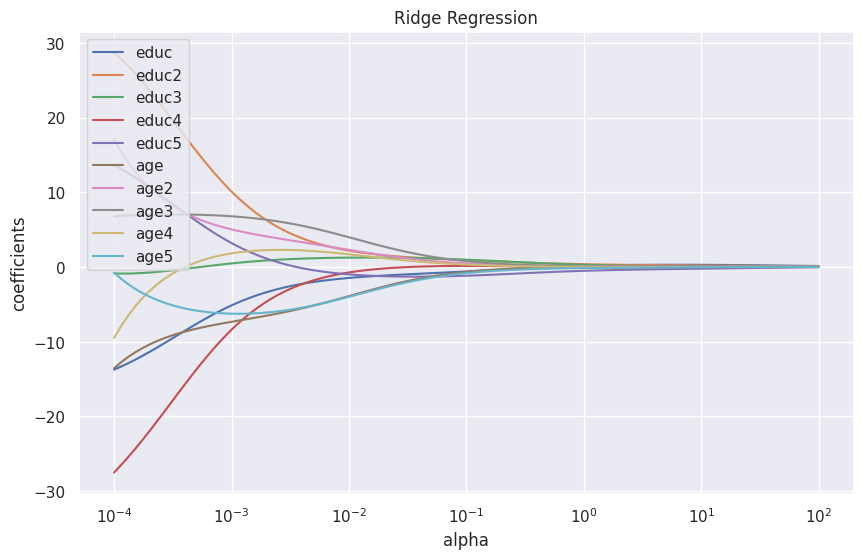

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.071e+02, tolerance: 7.615e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.851e+02, tolerance: 7.615e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e+02, tolerance: 7.615e

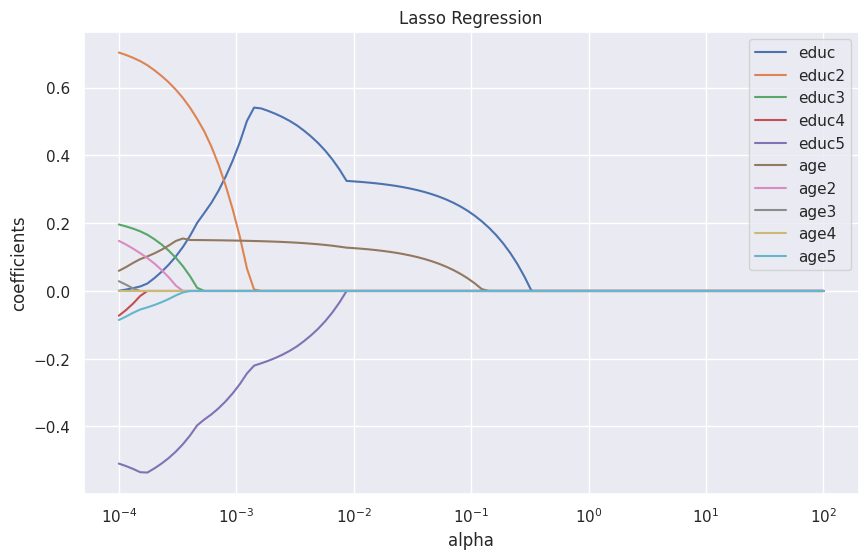

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.725e+02, tolerance: 7.615e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.616e+02, tolerance: 7.615e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.479e+02, tolerance: 7.615e

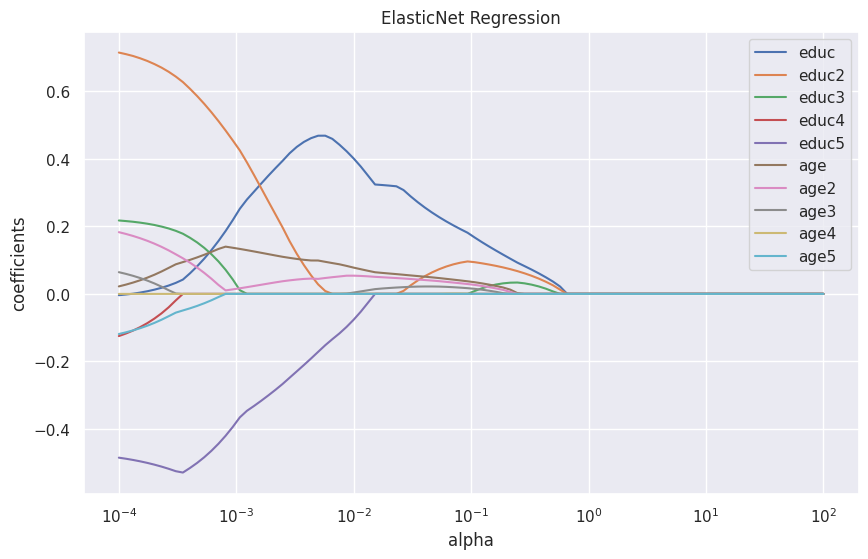

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = 10**np.linspace(-4, 2, 100)

def plot_coef_vs_alpha(model_class, title):
    coefs = []
    for alpha in alphas:
        model = model_class(alpha=alpha).fit(X_train, y_train)
        coefs.append(model.coef_)

    plt.figure(figsize=(10, 6))
    plt.plot(alphas, coefs)
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('coefficients')
    plt.title(title)
    plt.legend(X.columns)
    plt.show()

plot_coef_vs_alpha(Ridge, 'Ridge Regression')
plot_coef_vs_alpha(Lasso, 'Lasso Regression')
plot_coef_vs_alpha(ElasticNet, 'ElasticNet Regression')

Interpretation of plots: This is based off the plots alone. We need to use CV to get an accurate optimal value for lambda, not just the plots!

**Ridge:** Based off what we can see, the optimal value for lambda in Ridge Regression is between 10^-2 and 10^-1. The most significant features appear to be age3 (gray line), age (brown line), and age5 (teal line) as they are the farthest features away from zero. Educ4 (red line) would be the least significant feature as it is super close to 0 (Note: it does not equal exactly zero).

**LASSO:** Based off what we can see, the optimal value for lambda in LASSO Regression is going to be between 10^-1.5 (ish) and 10^-3 (ish). The majority of features equal 0 when lambda is 10^-3. The four features that are left, in order of least significant to most significant are: educ2 (orange line), educ5 (purple line), age(brown line), educ (blue line).

**Elastic Net:** Based off what we can see, the optimal value for lambda in Elastic Net Regression is going to be between 10^-1 (ish - somewhere between 10^-1 and 10^0 but closer to 10^-1 side). This is where the majority of features start to stabalize out.

#6.Answer the following...


6.1 Ridge Regression Plot: Which coefficients drop most significantly when alpha increases from 0.0001 to 10?

educ2 and educ4


6.2  Lasso regression plot: What are the top 2 variables that survive when alpha=0.1?

educ and age

# 7.Optimal HyperParameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the range of alphas to search
alphas = 10**np.linspace(-4, 2, 200)

# Set up the parameter grid
param_grid = {'alpha': alphas}

# Perform GridSearchCV for Ridge, Lasso, and ElasticNet
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
elastic_cv = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the models
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)
elastic_cv.fit(X_train, y_train)

# Extract the optimal alphas
optimal_alpha_ridge = ridge_cv.best_params_['alpha']
optimal_alpha_lasso = lasso_cv.best_params_['alpha']
optimal_alpha_elastic = elastic_cv.best_params_['alpha']

# Print the results
print(f"Optimal alpha for Ridge: {optimal_alpha_ridge}")
print(f"Optimal alpha for Lasso: {optimal_alpha_lasso}")
print(f"Optimal alpha for ElasticNet: {optimal_alpha_elastic}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.121e+01, tolerance: 5.889e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.892e+02, tolerance: 6.058e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+02, tolerance: 6.339e

Optimal alpha for Ridge: 0.0032176417502507355
Optimal alpha for Lasso: 0.0019791668678535573
Optimal alpha for ElasticNet: 0.003001835813575589


In [ ]:
optimal_alpha_ridge = 0.0032176417502507355
optimal_alpha_lasso = 0.0019791668678535573
optimal_alpha_elastic = 0.003001835813575589

# 8.Model Refit

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Optimal alphas from cross-validation
optimal_alpha_ridge = 0.0032176417502507355
optimal_alpha_lasso = 0.0019791668678535573
optimal_alpha_elastic = 0.003001835813575589

# Refit models with optimal alphas
lr_opt = LinearRegression().fit(X_train, y_train)
ridge_opt = Ridge(alpha=optimal_alpha_ridge).fit(X_train, y_train)
lasso_opt = Lasso(alpha=optimal_alpha_lasso).fit(X_train, y_train)
elastic_opt = ElasticNet(alpha=optimal_alpha_elastic).fit(X_train, y_train)

# Generate predictions for the test set
y_hat_linear_opt = lr_opt.predict(X_test)
y_hat_ridge_opt = ridge_opt.predict(X_test)
y_hat_lasso_opt = lasso_opt.predict(X_test)
y_hat_net_opt = elastic_opt.predict(X_test)

# Create the df_predictions_optimal dataframe
df_predictions_optimal = pd.DataFrame({
    'y_test': y_test,
    'y_hat_linear': y_hat_linear_opt,
    'y_hat_ridge': y_hat_ridge_opt,
    'y_hat_lasso': y_hat_lasso_opt,
    'y_hat_net': y_hat_net_opt
})

# Display the first few rows of the dataframe
print(df_predictions_optimal.head())

       y_test  y_hat_linear  y_hat_ridge  y_hat_lasso  y_hat_net
321 -0.603609     -0.043068    -0.025047    -0.021550  -0.021373
70   1.229893      0.643503     0.686309     0.563510   0.565710
209 -0.229981     -0.489132    -0.417371    -0.350655  -0.351960
549  0.485110     -0.496609    -0.424490    -0.397670  -0.397599
712 -0.131006     -0.043068    -0.025047    -0.021550  -0.021373


# 9.RMSE Test

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE for each model
rmse_linear = np.sqrt(mean_squared_error(df_predictions_optimal['y_test'], df_predictions_optimal['y_hat_linear']))
rmse_ridge = np.sqrt(mean_squared_error(df_predictions_optimal['y_test'], df_predictions_optimal['y_hat_ridge']))
rmse_lasso = np.sqrt(mean_squared_error(df_predictions_optimal['y_test'], df_predictions_optimal['y_hat_lasso']))
rmse_elastic = np.sqrt(mean_squared_error(df_predictions_optimal['y_test'], df_predictions_optimal['y_hat_net']))

# Create a dictionary of RMSE values
rmse_dict = {
    'Linear Regression': rmse_linear,
    'Ridge Regression': rmse_ridge,
    'Lasso Regression': rmse_lasso,
    'ElasticNet Regression': rmse_elastic
}

# Sort the dictionary by RMSE values
ranked_models = sorted(rmse_dict.items(), key=lambda x: x[1])

# Print RMSE values and rankings
print("RMSE values for each model:")
for model, rmse in rmse_dict.items():
    print(f"{model}: {rmse:.4f}")

print("\nModels ranked by performance (best to worst):")
for rank, (model, rmse) in enumerate(ranked_models, 1):
    print(f"{rank}. {model}: {rmse:.4f}")

# Determine if regularized models beat the simple linear model
beat_linear = any(rmse < rmse_linear for rmse in [rmse_ridge, rmse_lasso, rmse_elastic])


RMSE values for each model:
Linear Regression: 0.8930
Ridge Regression: 0.8805
Lasso Regression: 0.8811
ElasticNet Regression: 0.8812

Models ranked by performance (best to worst):
1. Ridge Regression: 0.8805
2. Lasso Regression: 0.8811
3. ElasticNet Regression: 0.8812
4. Linear Regression: 0.8930


Yes, we were able to beat the simple linear model. This means that the forms of regularization were helpful in avoiding model overfit.There was not much of a difference in terms of L1 and L2 and it didn't beat the model by much. However, the penalized regressions, Ridge, LASSO, and Elastic Net, allowed us to add a little more bias into our model which in turn, dropped the variance of the model, and our total error a good amount. Using Ridge, LASSO, and Elastic Net, our model has a better (more balanced) tradeoff between generalization and optimization.  